## NSF Proposal 2016 ##

Goals
* Halpha imaging of $\log(M*) > 8$ filament galaxies
* Analysis of WISE sizes

In [35]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

virgo_redshift = 0.0036 # from NED

In [2]:
nsafile='/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa=fits.getdata(nsafile)
# read in WISE catalog
wisefile='/Users/rfinn/research/NSA/nsa_v0_1_2_wise.fits'
wise=fits.getdata(wisefile)
# read in John's stellar masses
massfile='/Users/rfinn/research/NSA/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.fits'
jmass=fits.getdata(massfile)

In [8]:
# select galaxies near Virgo
raflag = (nsa.RA > 140.) & (nsa.RA < 240.) 
decflag= (nsa.DEC > -10.) & (nsa.DEC < 50.) 
velflag = (nsa.Z*3.e5 > 1000.) & (nsa.Z*3.e5 < 3000.)
vflag = raflag & decflag & velflag
vra=187.69708
vdec=12.33694
rad_distance = np.sqrt((nsa.RA - vra)**2+(nsa.DEC-vdec)**2)

## RA and Dec color coded by recession velocity ##

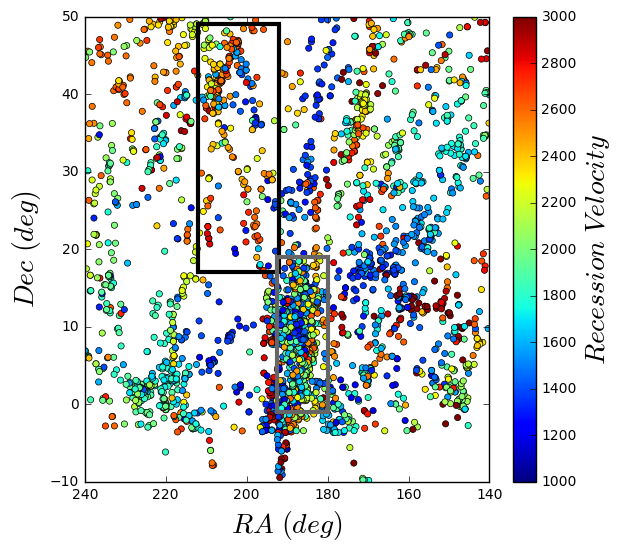

In [11]:
fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[vflag],nsa.DEC[vflag],c=nsa.ZDIST[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([140,240,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)

# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
fig.gca().add_artist(rect)

# Boselli rectangle
ra_min=180
dec_min=-1
dra=12.5
ddec=20
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3)
fig.gca().add_artist(rect)
#cb=plt.colorbar(fraction=.08)

#plt.title('NASA-Sloan Atlas Galaxies in the Vicinity of Virgo')
plt.savefig('Virgo_positions_NSF.png')

## Galaxies in the Filament ##

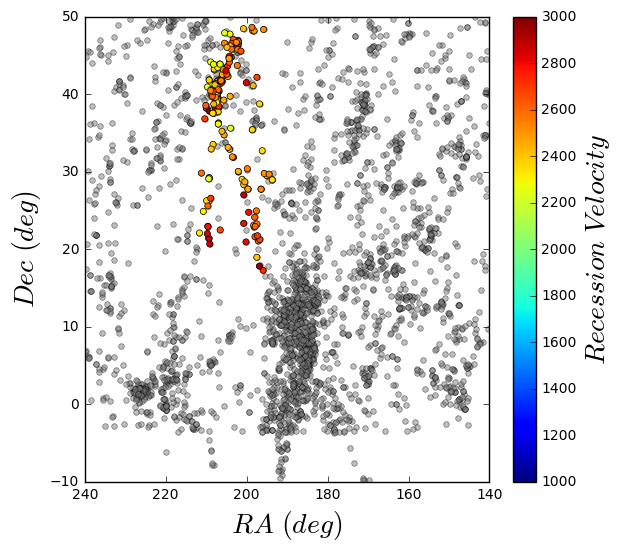

In [25]:
# color coded by recession velocity
filament = (nsa.RA > 192.) & (nsa.RA < 212) & (nsa.DEC > 17.) & (nsa.DEC < 49.) & (nsa.Z*3.e5 >2200.) & (nsa.Z*3.e5 < 3000.)

fig=plt.figure(figsize=(6,6))
plt.plot(nsa.RA[vflag],nsa.DEC[vflag],'ko',c='0.5',markersize=4,alpha=0.5)
plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=nsa.Z[filament]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)

plt.axis([140,240,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)

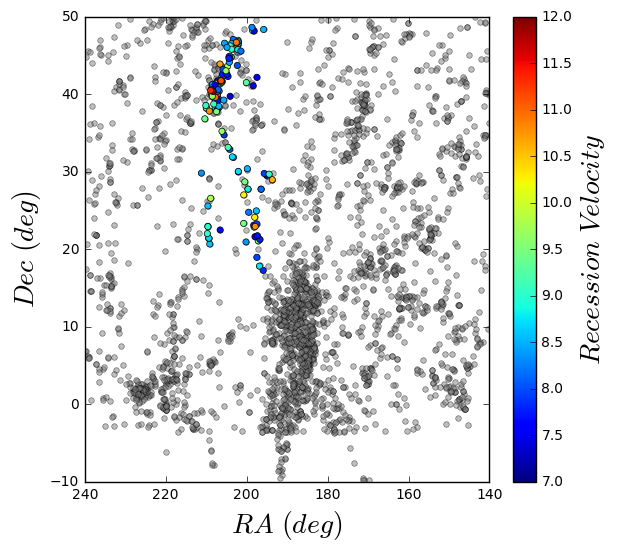

In [29]:
# color coded by stellarmass
filament = (nsa.RA > 192.) & (nsa.RA < 212) & (nsa.DEC > 17.) & (nsa.DEC < 49.) & (nsa.Z*3.e5 >2400.) & (nsa.Z*3.e5 < 3000.)

fig=plt.figure(figsize=(6,6))
plt.plot(nsa.RA[vflag],nsa.DEC[vflag],'ko',c='0.5',markersize=4,alpha=0.5)
plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=jmass.MSTAR_50[filament],zorder=20,s=20,vmin=7,vmax=12,lw=0.5)

plt.axis([140,240,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)

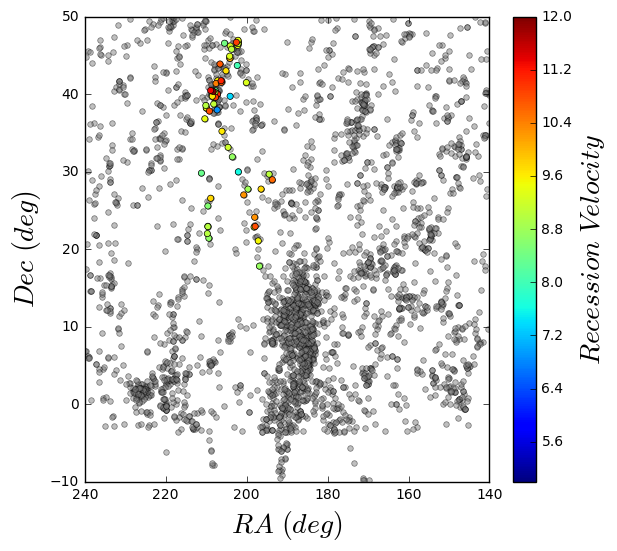

In [28]:
# color coded by WISE 22
wiseflag = (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.) 
filament = wiseflag & (nsa.RA > 192.) & (nsa.RA < 212) & (nsa.DEC > 17.) & (nsa.DEC < 49.) & (nsa.Z*3.e5 >2400.) & (nsa.Z*3.e5 < 3000.)

fig=plt.figure(figsize=(6,6))
plt.plot(nsa.RA[vflag],nsa.DEC[vflag],'ko',c='0.5',markersize=4,alpha=0.5)
plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=jmass.MSTAR_50[filament],zorder=20,s=20,vmin=5,vmax=12,lw=0.5)

plt.axis([140,240,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)

## Calculate SFR from 22um Flux ##

In [32]:
import sys
sys.path.append("/Users/rfinn/Dropbox/pythonCode/")
import chary_elbaz_24um as chary

Running on Rose's mac pro or laptop
Running on Rose's mac pro or laptop
--------------------------------------------------
Date: Tue Aug  1 16:32:05 2006
User: elbaz
Host: 251-198.ipac.caltech.edu
--------------------------------------------------
Format: 9
Architecture: ppc
Operating System: darwin
IDL Version: 6.1
--------------------------------------------------
Successfully read 14 records of which:
 - 10 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type NOTICE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - nulnu_iras25 [<type 'numpy.ndarray'>]
 - nulnuinlsun [<type 'numpy.ndarray'>]
 - nulnu_iras100 [<type 'numpy.ndarray'>]
 - nulnu_iras12 [<type 'numpy.ndarray'>]
 - lir_sanders [<type 'numpy.ndarray'>]
 - nulnu_iras60 [<type 'numpy.ndarray'>]
 - lir [<type 'numpy.ndarray'>]
 - nulnu_lw3 [<type 'numpy.ndarray'>]
 - nulnu_lw2 [<type 'numpy.ndarray'>]
 - lambda [<type 'numpy.ndarray'>]
-----------------------------

**convert magnitude to flux**

$$m_2 - m_1 = 2.5 log (f_2/f_1) $$

Let $m_1$ be the zeropoint with $m_1 = 0$ and $f_1 = 3631$~Jy.  Then 

$$m_2/2.5 = log(f_2/f_1) $$

$$10^{m_2/2.5} = f_2/f _1$$

$$ f_2 = f_1 \times 10^{m_2/2.5} $$

Plugging in 22$\mu$m values gives:

$$ f_{22} = 3631~Jy \times 10^{m_{22-AB}/2.5}$$

From 

http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html


$$F_\nu (Jy) = F_{\nu 0} \times 10^{-m_{Vega}/2.5} $$

where $F_{\nu_0} = 8.363$ for W4.

In [100]:
# get conversion for f22_Jy to Lir and SFR for a source with f22 = 1 micro-Jy
LIR_conv,SFR22_conv = chary.chary_elbaz_24um(virgo_redshift,1.)
print LIR,SFR22

[ 9444.92089844] [  3.75873845e+05   1.26427662e+05   1.08603071e+05 ...,   2.48337387e+05
   5.12202987e+08   1.75485851e+05]


In [101]:
# flux ZP of AB system is 3631 Jy
m22_AB = (wise.W4MPRO + 6.620)
f22 = 3631.*10.**(-1.*m22_AB/2.5)
f22_Jy = 8.363 * 10.**(-1.*wise.W4MPRO/2.5)

In [102]:
SFR22 = f22_Jy * 1.e6 * SFR22_conv[0]

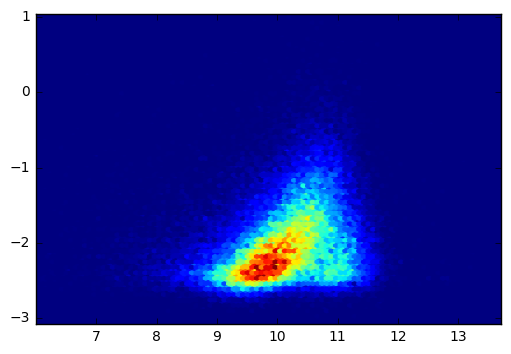

In [103]:
# SFR vs Stellar mass
plt.figure()
#plt.plot(jmass.MSTAR_50[wiseflag],SFR22[wiseflag],'k.')
flag = wiseflag & (jmass.MSTAR_50 < 14) & (jmass.MSTAR_50 > 6)
plt.hexbin(jmass.MSTAR_50[flag],np.log10(SFR22[flag]),gridsize=100)
#plt.axis([7,11,0,10])
#plt.gca().set_yscale('log')
#plt.axis([7,11,.003,500])
#plt.xlim(6,13)

(array([  5.00000000e+00,   9.00000000e+00,   7.00000000e+00,
          4.60000000e+01,   1.77000000e+02,   4.27000000e+02,
          1.04800000e+03,   2.64300000e+03,   4.99400000e+03,
          8.31100000e+03,   1.25350000e+04,   1.38360000e+04,
          1.27830000e+04,   1.20700000e+04,   1.07770000e+04,
          8.97300000e+03,   6.53600000e+03,   4.74400000e+03,
          3.85700000e+03,   3.38900000e+03,   2.92200000e+03,
          2.72900000e+03,   2.42400000e+03,   2.11900000e+03,
          2.01600000e+03,   1.89900000e+03,   1.71700000e+03,
          1.62300000e+03,   1.46400000e+03,   1.24600000e+03,
          1.27400000e+03,   1.07900000e+03,   9.41000000e+02,
          9.41000000e+02,   7.91000000e+02,   7.58000000e+02,
          7.24000000e+02,   6.27000000e+02,   5.70000000e+02,
          4.68000000e+02,   3.74000000e+02,   3.49000000e+02,
          3.58000000e+02,   2.61000000e+02,   2.57000000e+02,
          1.93000000e+02,   1.59000000e+02,   1.57000000e+02,
        

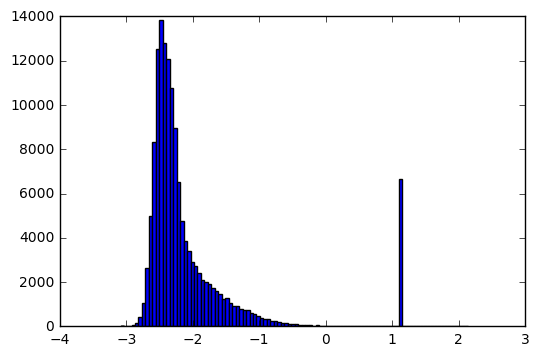

In [104]:
plt.figure()
plt.hist(np.log10(SFR22),bins=100)

In [75]:
SFR22

array([  9.97970981e-03,   3.35674162e-03,   2.88348644e-03, ...,
         6.59352888e-03,   1.35993425e+01,   4.65927038e-03])